In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import re 
from operator import itemgetter
import warnings
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
import PyCCELL_PRFQT as px
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

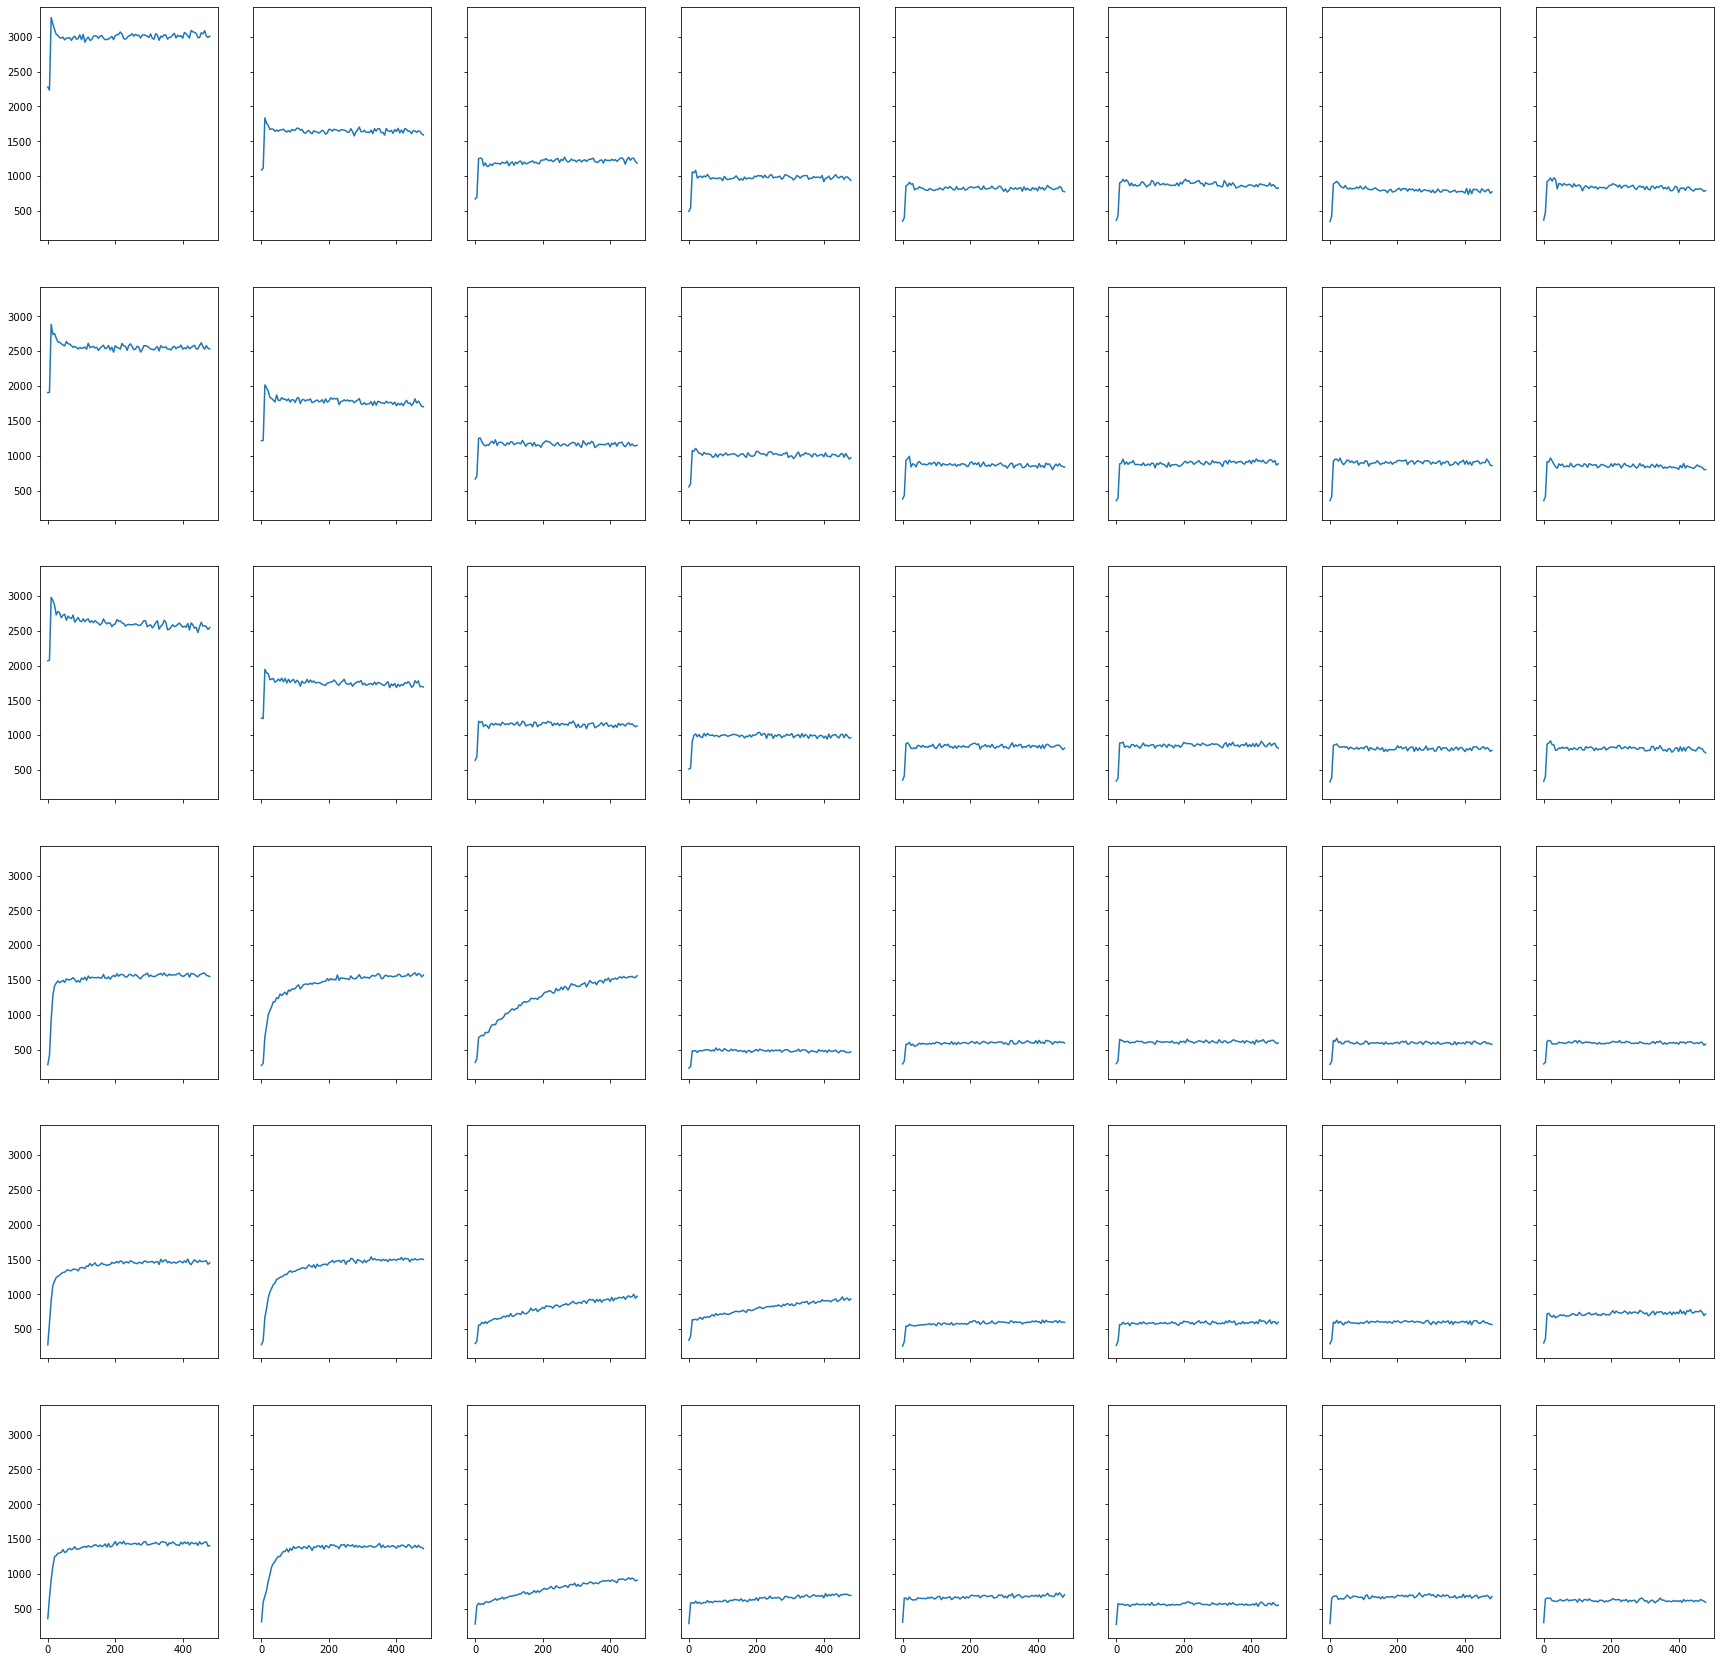

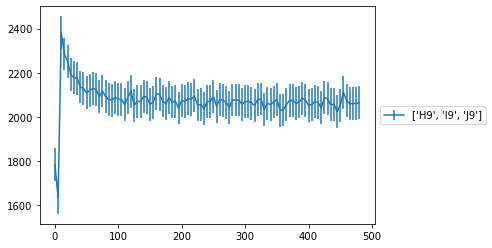

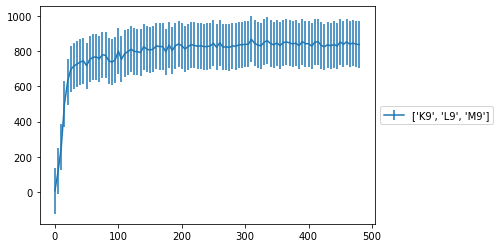

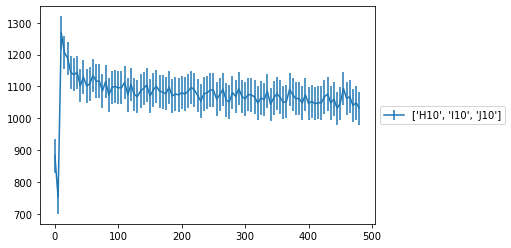

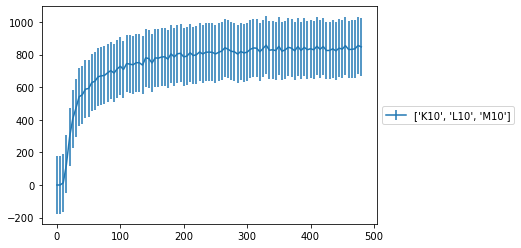

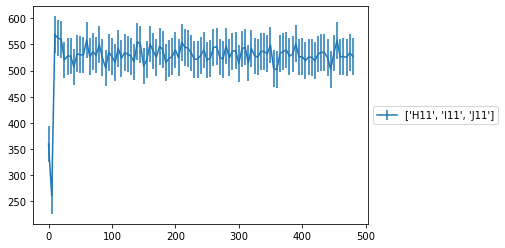

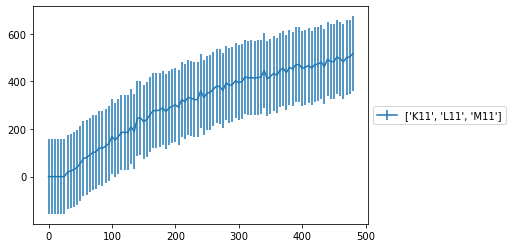

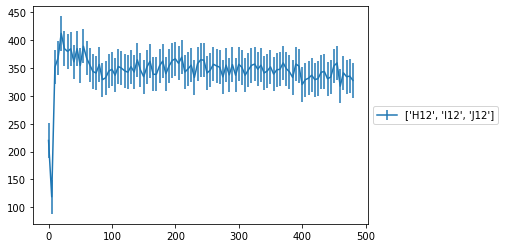

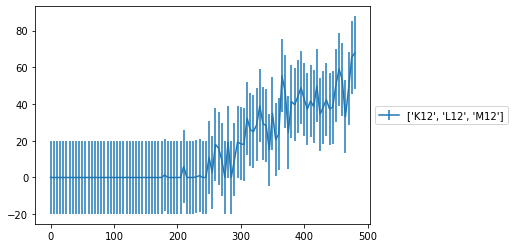

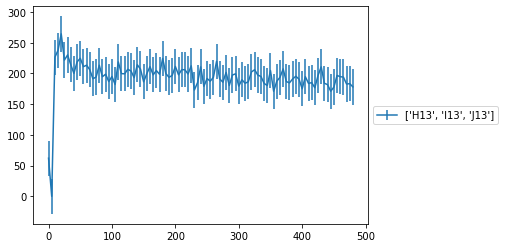

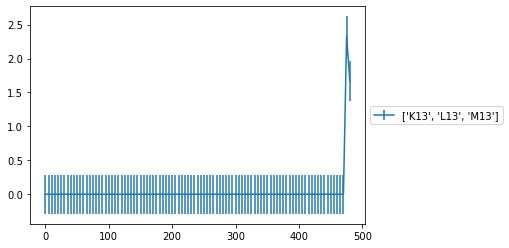

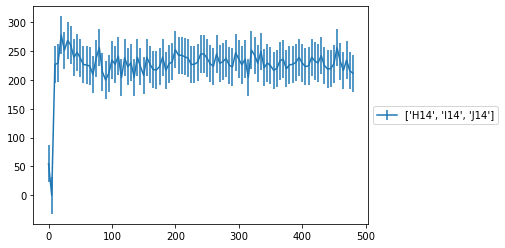

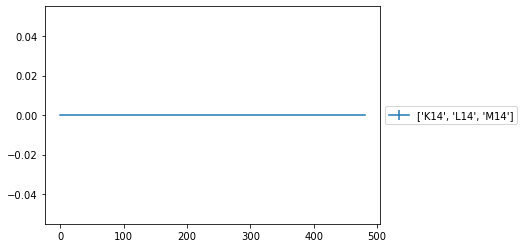

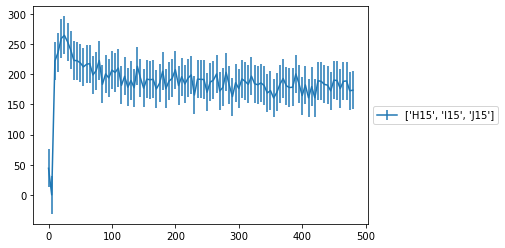

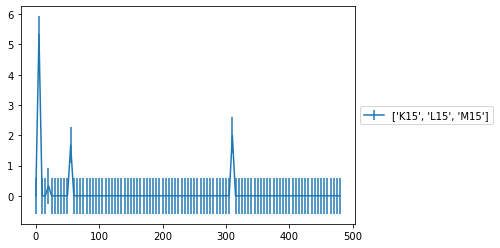

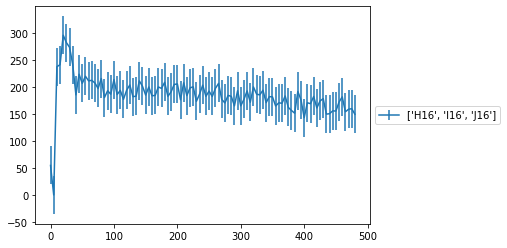

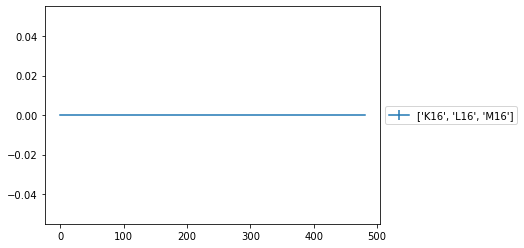

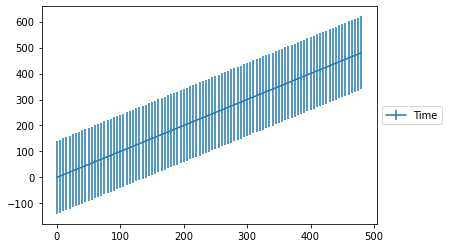

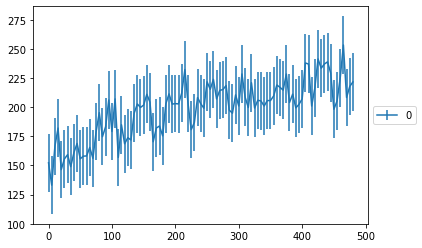

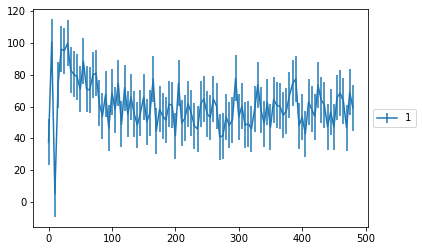

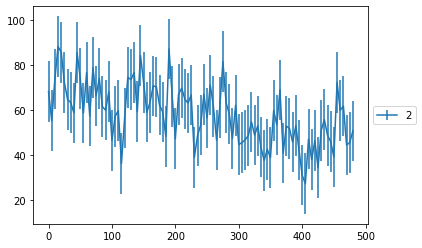

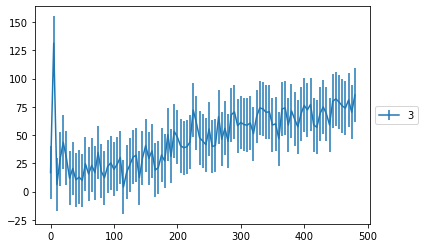

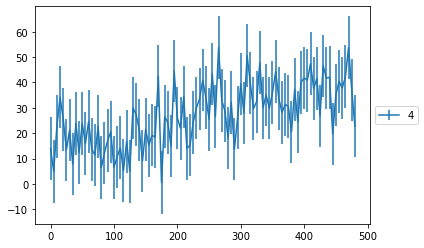

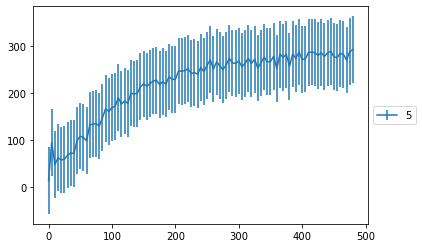

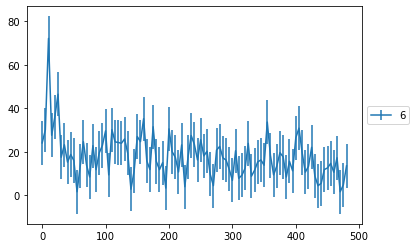

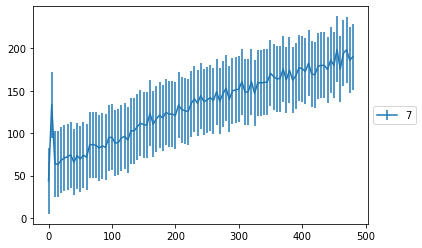

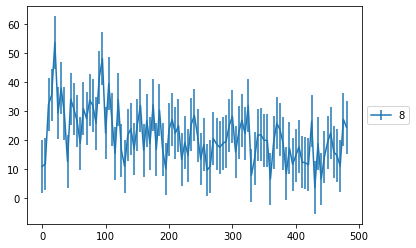

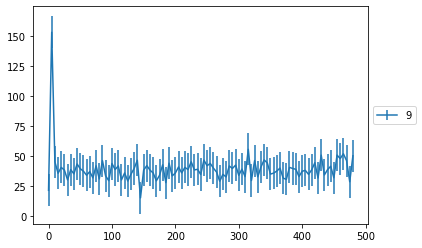

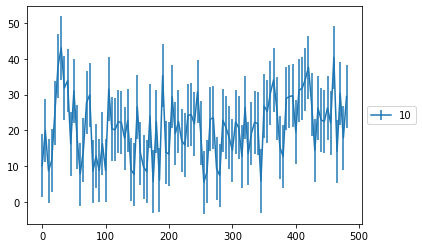

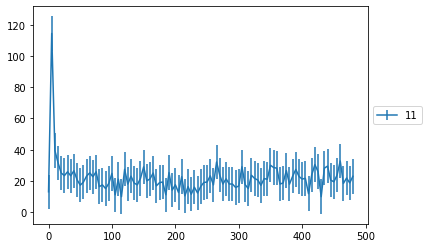

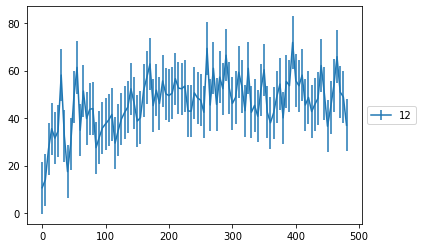

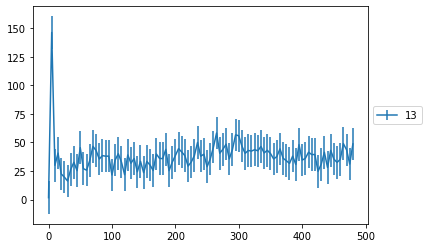

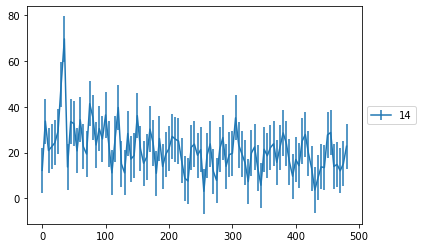

In [3]:
test = px.main('../results/SHERLOCK/target_concentration/sherlock_target_concentr.xlsx'
               ,50,"NO",6,8,'col',['K16','L16','M16'],"NO")


In [4]:
test.rename(columns={"['H9', 'I9', 'J9']": '10µM_FITC',
                   "['H10', 'I10', 'J10']": '5µM_FITC',
                     "['H11', 'I11', 'J11']":'2µM_FITC' ,
                     "['H12', 'I12', 'J12']": '1µM_FITC',
                    "['H13', 'I13', 'J13']": '0.1µM_FITC',
                      "['H14', 'I14', 'J14']":'0.01µM_FITC' ,
                     "['H15', 'I15', 'J15']": '0.001µM_FITC',
                    "['H16', 'I16', 'J16']": 'NC_FITC',
                     "['K9', 'L9', 'M9']": '1µM_target',
                   "['K10', 'L10', 'M10']": '0.1µM_target',
                     "['K11', 'L11', 'M11']":'0.01µM_target' ,
                     "['K12', 'L12', 'M12']": '1nM_target',
                    "['K13', 'L13', 'M13']": '0.1nM_target',
                      "['K14', 'L14', 'M14']":'0.01nM_target' ,
                     "['K15', 'L15', 'M15']": '0.1pM_target',
                    "['K16', 'L16', 'M16']": 'NC_target',
                     0: '10µM_FITC_std',
                   1: '1µM_target_std',
                     2: '5µM_FITC_std',
                     3: '0.1µM_target_std',
                    4: '2µM_FITC_std',
                    5: '0.01µM_target_std',
                   6: '1µM_FITC_std',
                     7:'1nM_target_std' ,
                     8: '0.1µM_FITC_std',
                    9: '0.1nM_target_std',
                    10: '0.01µM_FITC_std',
                   11: '0.01nM_target_std',
                     12: '1nM_FITC_std',
                     13: '0.1pM_target_std',
                    14: 'NC_FITC_std',
                    15:'NC_target_std'},
          inplace=True, errors='raise')

test.head()

,10µM_FITC,1µM_target,5µM_FITC,0.1µM_target,2µM_FITC,0.01µM_target,1µM_FITC,1nM_target,0.1µM_FITC,0.1nM_target,...,1µM_FITC_std,1nM_target_std,0.1µM_FITC_std,0.1nM_target_std,0.01µM_FITC_std,0.01nM_target_std,1nM_FITC_std,0.1pM_target_std,NC_FITC_std,NC_target_std
0,1784.333333,6.666667,882.333333,0.000000,359.666667,0.0,220.000000,0.0,62.000000,0.0,...,24.143092,43.683203,10.964589,21.452791,10.208929,13.021350,10.656245,1.699673,12.256518,3.399346
1,1634.666667,117.333333,752.333333,0.000000,261.000000,0.0,119.000000,0.0,0.000000,0.0,...,30.099834,133.492405,11.860298,153.313042,19.938795,114.438727,14.007934,146.217494,33.727668,142.361043
2,2381.666667,254.666667,1268.000000,13.333333,568.666667,0.0,351.333333,0.0,226.333333,0.0,...,72.149536,64.053797,32.293790,45.188494,8.730534,39.465878,26.960877,30.011109,20.885934,42.679686
3,2284.333333,499.000000,1206.333333,127.000000,562.000000,0.0,367.666667,0.0,237.666667,0.0,...,27.652607,63.205133,35.505868,35.693137,11.614168,31.584103,35.518383,40.713088,22.553640,41.994709
4,2251.333333,627.333333,1188.666667,293.000000,559.333333,0.0,412.000000,0.0,264.333333,0.0,...,36.150918,68.073490,53.541261,40.549010,24.832774,25.037749,31.538336,22.449944,24.262454,27.475241


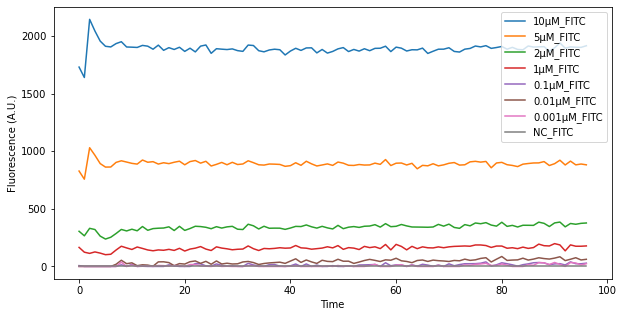

In [178]:
plt.rcParams["figure.figsize"] = (10,5)
names = [i for i in test.columns if 'FITC' in i and 'std' not in i]
names
test[names].plot()
plt.xlabel("Time")
plt.ylabel('Fluorescence (A.U.)')
plt.show()

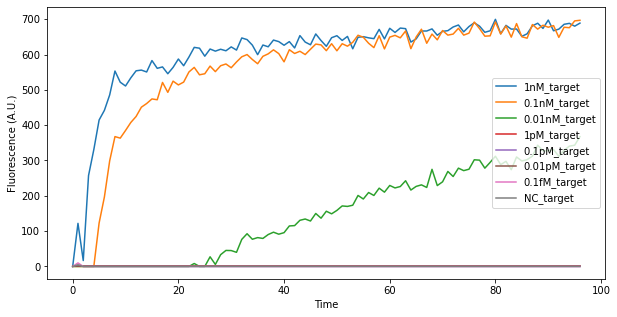

In [179]:
plt.rcParams["figure.figsize"] = (10,5)
names = [i for i in test.columns if 'target' in i and 'std' not in i]
names
test[names].plot()
plt.xlabel("Time")
plt.ylabel('Fluorescence (A.U.)')
plt.legend(loc='right')
plt.show()

## FITC fluorescence / µM equivalency

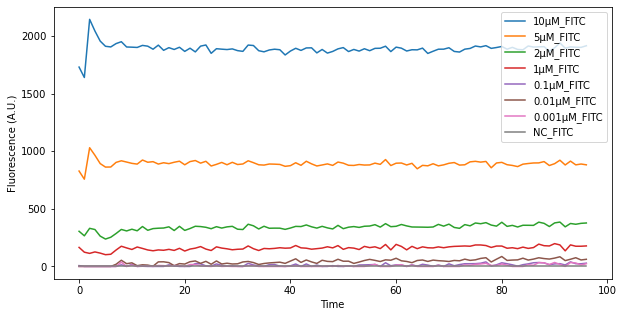

In [180]:
plt.rcParams["figure.figsize"] = (10,5)
names = [i for i in test.columns if 'FITC' in i and 'std' not in i]
names
test[names].plot()
plt.xlabel("Time")
plt.ylabel('Fluorescence (A.U.)')
plt.show()

In [181]:
std = [i for i in test.columns if 'FITC' in i and 'std' in i]
std = test[std].iloc[75:96]

In [182]:
std.columns

Index(['10µM_FITC_std', '5µM_FITC_std', '2µM_FITC_std', '1µM_FITC_std',
       '0.1µM_FITC_std', '0.01µM_FITC_std', '1nM_FITC_std', 'NC_FITC_std'],
      dtype='object')

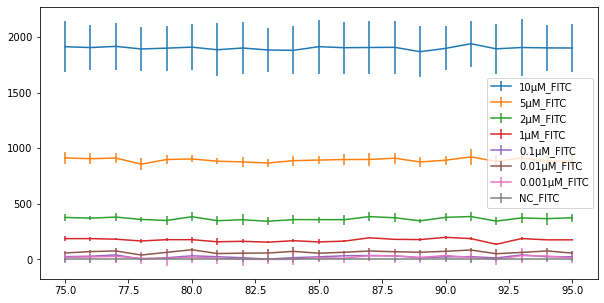

In [183]:
FITC = test[names].iloc[75:96]
FITC.head()

FITC.plot(yerr=[std['10µM_FITC_std'], std['5µM_FITC_std'], std['2µM_FITC_std'], std['1µM_FITC_std'],
       std['0.1µM_FITC_std'], std['0.01µM_FITC_std'], std['1nM_FITC_std'], std['NC_FITC_std']])
plt.legend(loc='right')
plt.show()

In [184]:
mean = [FITC[i].mean() for i in FITC.columns]
sd = [std[i].mean() for i in std.columns]

In [185]:
concentration = [float(i[:-7]) for i in FITC.columns[:-1]]
concentration.append(0)
concentration

[10.0, 5.0, 2.0, 1.0, 0.1, 0.01, 0.001, 0]

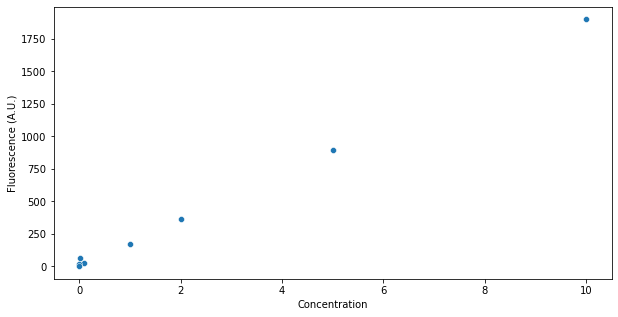

In [186]:
sns.scatterplot(x=concentration,y=mean)
#plt.xlim([0,0.02])
#plt.xscale('log')
plt.xlabel('Concentration')
plt.ylabel('Fluorescence (A.U.)')
plt.show()

In [187]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(np.asarray(concentration).reshape((-1, 1)), mean)

In [188]:
r_sq = model.score(np.asarray(concentration).reshape((-1, 1)), mean)
print(f"coefficient of determination: {r_sq}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.9977844700869568
slope: [186.47588798]


In [189]:
y_pred = lm.predict(np.asarray(concentration).reshape((-1, 1)))

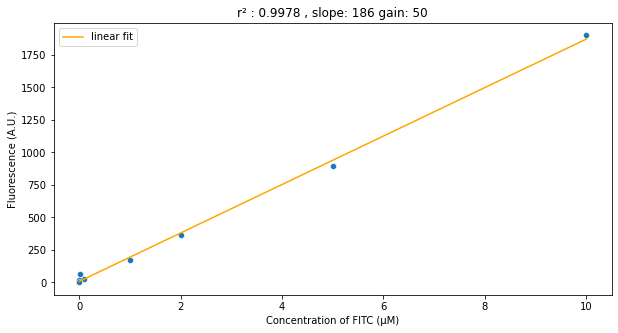

In [190]:
sns.scatterplot(x=concentration,y=mean)
plt.plot(concentration,y_pred,label='linear fit',color='orange')
plt.legend()
plt.xlabel('Concentration of FITC (µM)')
plt.ylabel('Fluorescence (A.U.)')
plt.title('r² : '+str(round(r_sq,4))+' , slope: '+str(round(model.coef_[0]))+ ' gain: 50')
plt.savefig('../images/SHERLOCK/calibration/calibration_50.png',dpi=300)
plt.show()

In [10]:
correct = px.mainf('../results/SHERLOCK/target_concentration/sherlock_target_concentr.xlsx'
               ,70,"NO",'col',['K16','L16','M16'])

correct = correct/2100

In [11]:
correct.rename(columns={"['H9', 'I9', 'J9']": '10µM_FITC',
                   "['H10', 'I10', 'J10']": '5µM_FITC',
                     "['H11', 'I11', 'J11']":'2µM_FITC' ,
                     "['H12', 'I12', 'J12']": '1µM_FITC',
                    "['H13', 'I13', 'J13']": '0.1µM_FITC',
                      "['H14', 'I14', 'J14']":'0.01µM_FITC' ,
                     "['H15', 'I15', 'J15']": '0.001µM_FITC',
                    "['H16', 'I16', 'J16']": 'NC_FITC',
                     "['K9', 'L9', 'M9']": '1µM_target',
                   "['K10', 'L10', 'M10']": '0.1µM_target',
                     "['K11', 'L11', 'M11']":'0.01µM_target' ,
                     "['K12', 'L12', 'M12']": '1nM_target',
                    "['K13', 'L13', 'M13']": '0.1nM_target',
                      "['K14', 'L14', 'M14']":'0.01nM_target' ,
                     "['K15', 'L15', 'M15']": '0.1pM_target',
                    "['K16', 'L16', 'M16']": 'NC_target',
                     0: '10µM_FITC_std',
                   1: '1µM_target_std',
                     2: '5µM_FITC_std',
                     3: '0.1µM_target_std',
                    4: '2µM_FITC_std',
                    5: '0.01µM_target_std',
                   6: '1µM_FITC_std',
                     7:'1nM_target_std' ,
                     8: '0.1µM_FITC_std',
                    9: '0.1nM_target_std',
                    10: '0.01µM_FITC_std',
                   11: '0.01nM_target_std',
                     12: '1nM_FITC_std',
                     13: '0.1pM_target_std',
                    14: 'NC_FITC_std',
                    15:'NC_target_std'},
          inplace=True, errors='raise')

correct.head()

,10µM_FITC,1µM_target,5µM_FITC,0.1µM_target,2µM_FITC,0.01µM_target,1µM_FITC,1nM_target,0.1µM_FITC,0.1nM_target,...,1µM_FITC_std,1nM_target_std,0.1µM_FITC_std,0.1nM_target_std,0.01µM_FITC_std,0.01nM_target_std,1nM_FITC_std,0.1pM_target_std,NC_FITC_std,NC_target_std
0,9.697937,0.055873,4.803333,0.000000,1.954603,0.009841,1.135397,0.0,0.391905,0.0,...,0.136073,0.244756,0.082644,0.091951,0.058089,0.056878,0.054902,0.007866,0.014142,0.011208
1,8.678571,0.388095,4.078571,0.000000,1.334603,0.000000,0.628889,0.0,0.000000,0.0,...,0.133369,0.726438,0.038502,0.847473,0.063122,0.623463,0.079329,0.866017,0.084873,0.758101
2,12.689206,1.199524,6.717937,0.078254,2.983651,0.000000,1.790794,0.0,1.228095,0.0,...,0.394305,0.336887,0.207361,0.194752,0.291521,0.172988,0.148309,0.156005,0.152101,0.185042
3,12.426984,2.635714,6.500952,0.618413,2.926667,0.000000,2.038095,0.0,1.305397,0.0,...,0.161015,0.335035,0.191609,0.177314,0.119023,0.159265,0.179541,0.169277,0.108229,0.262830
4,12.210159,3.302222,6.296508,1.371587,2.918889,0.000000,2.135079,0.0,1.412381,0.0,...,0.173781,0.338014,0.228196,0.181659,0.113460,0.053356,0.216622,0.189353,0.135465,0.251958


In [15]:
correct.Time = correct.Time * 2100

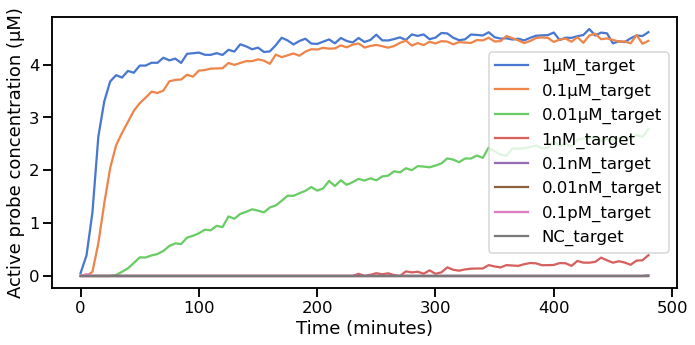

In [24]:
names = [i for i in correct.columns if 'target' in i and 'std' not in i]
std= [i for i in correct.columns if 'target' in i and 'std' in i]

#correct[names].plot(yerr=[correct[std[0]],correct[std[1]],correct[std[2]],correct[std[3]],
#                          correct[std[4]],correct[std[5]],correct[std[6]],correct[std[7]]])
plt.rcParams["figure.figsize"] = (10,5)
for i in names:
    plt.plot(correct.Time,correct[i],label =correct[i].name)
#correct[names].plot()
plt.xlabel("Time (minutes)")
plt.ylabel('Active probe concentration (µM)')
plt.legend(loc='right')
plt.tight_layout()
plt.savefig("../images/SHERLOCK/target_dilution.png",dpi=300)
plt.show()

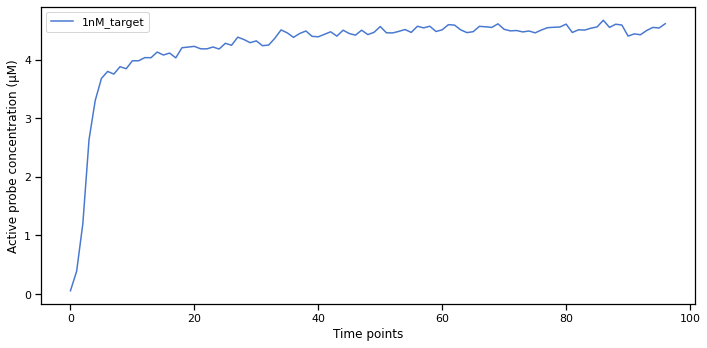

In [22]:
correct[correct.columns[1]].plot()
plt.legend()
plt.xlabel("Time points")
plt.ylabel('Active probe concentration (µM)')
plt.tight_layout()
plt.savefig('../images/SHERLOCK/FITC_conversion_meeting.png',dpi=300)
plt.show()

In [8]:
def endpoint(df):
    end_point = pd.DataFrame(df.max(axis=0))
    end_point = end_point.T
    end_point= end_point.drop(columns=[i for i in end_point.columns if 'Time'in i or'NC'in i or'std' in i or 'FITC' in i])
    return end_point

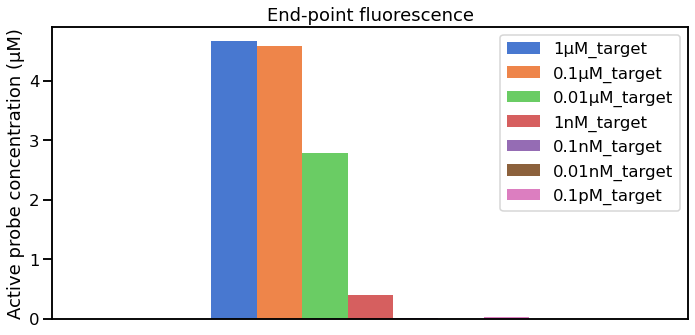

In [9]:
end_point = endpoint(correct)
sns.set_context("talk")
sns.set_palette("muted")

end_point.plot(kind="bar")
plt.legend()
plt.xticks([])
plt.ylabel("Active probe concentration (µM)")
plt.title("End-point fluorescence")
plt.tight_layout()
plt.savefig("../images/SHERLOCK/end_point_target.png",dpi=300)
plt.show()